In [1]:
import librosa
from matplotlib import pyplot as plt 
import pandas as pd
import IPython.display as ipd 

In [2]:
audio = "D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav" 

In [3]:
ipd.Audio(audio)

In [4]:
y, sr = librosa.load(audio) 

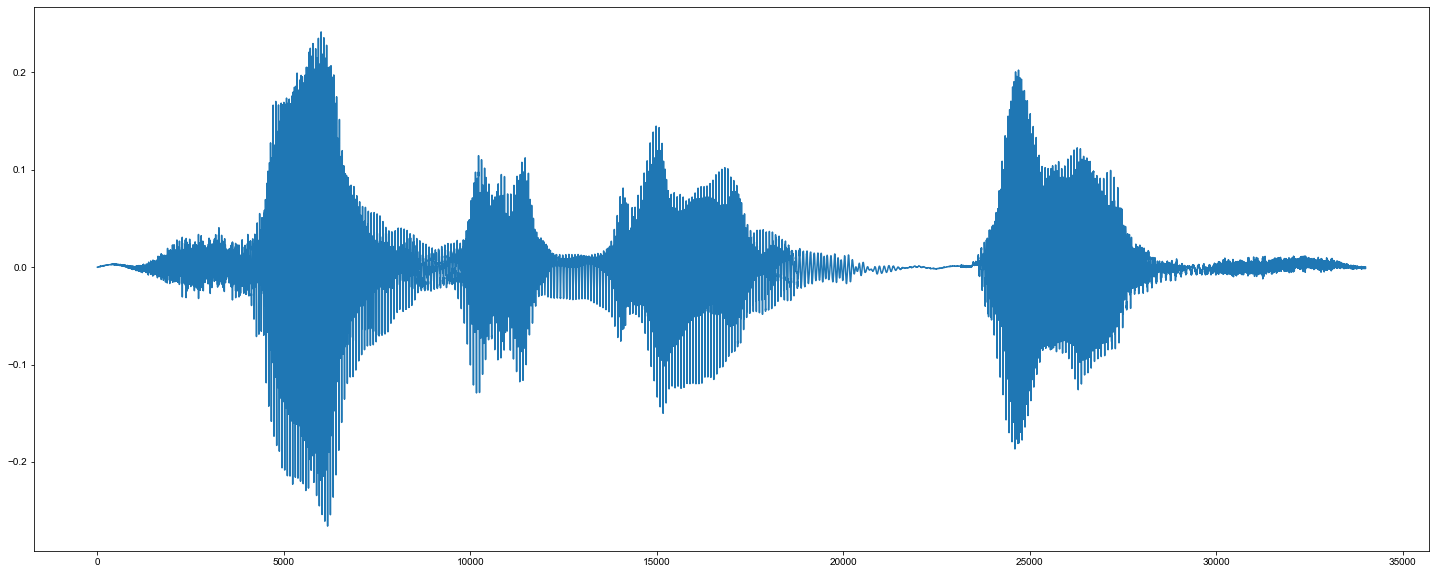

In [5]:
plt.figure(figsize = (25, 10)) 
plt.plot(y)
from itertools import cycle
import librosa.display
import seaborn as sns
sns.set_theme(style = "white" , palette = None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"] 
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"]) 

In [6]:
sr

22050

In [7]:
y

array([-3.8700064e-06,  4.2080985e-05,  4.6381530e-05, ...,
       -1.4604805e-03, -1.2314213e-03,  0.0000000e+00], dtype=float32)

In [8]:
def features_extract(file): 
    audio, sam = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sam, n_mfcc=40)
    mfcc_scaled = np.mean(mfccs_features.T, axis=0)
    
    return mfcc_scaled

In [9]:
import numpy as np 
import os
from tqdm import tqdm 
path = "D:\\\Emotions_Audio\\\TESS Toronto emotional speech set data\\\TESS Toronto emotional speech set data"
extracted_features = []
print(len(extracted_features))
all_files = os.listdir(path) # list containing all folders name
print(path)

0
D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data


In [10]:
features = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Pleasant_Surprise', 'Sad'] 
j=0 
while j!=14:
    sets = all_files[j]
    cur_path = path + "\\\{}".format(sets)
    print(cur_path)
    # print(list(["Angry", os.listdir(cur_path)]))
    for i in tqdm(os.listdir(cur_path)):
        data = features_extract(cur_path + "\\\{}".format(i))
        extracted_features.append([sets, data])
    j+=1


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.33it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_disgust


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 17.48it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Fear


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.87it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_happy


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.47it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_neutral


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 18.99it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Pleasant_surprise


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.34it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Sad


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:12<00:00, 16.46it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_angry


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.19it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_disgust


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:12<00:00, 16.40it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_fear


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 22.00it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_happy


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.31it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_neutral


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.09it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_pleasant_surprised


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 18.93it/s]


D:\\Emotions_Audio\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_sad


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 17.39it/s]


In [11]:
voice = pd.DataFrame(extracted_features)
voice.columns = ['Mood', 'Data']  

In [12]:
voice 

,Mood,Data
0,OAF_angry,"[-387.35645, 58.00525, -23.070848, -6.4950075,..."
1,OAF_angry,"[-448.57208, 70.98286, -8.170729, -14.899887, ..."
2,OAF_angry,"[-407.019, 33.079754, -11.734395, 6.1423593, -..."
3,OAF_angry,"[-387.9774, 58.727615, -17.779144, -7.8950744,..."
4,OAF_angry,"[-402.43118, 57.398098, -2.0817034, 13.913458,..."
...,...,...
2795,YAF_sad,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8..."
2796,YAF_sad,"[-409.28275, 83.23681, 19.076742, 46.272194, -..."
2797,YAF_sad,"[-376.129, 73.641525, 30.505957, 48.876934, -1..."
2798,YAF_sad,"[-427.49304, 75.27528, 23.589348, 43.188694, -..."


In [13]:
voice['Mood'].value_counts() 

OAF_angry                 200
OAF_disgust               200
OAF_Fear                  200
OAF_happy                 200
OAF_neutral               200
OAF_Pleasant_surprise     200
OAF_Sad                   200
YAF_angry                 200
YAF_disgust               200
YAF_fear                  200
YAF_happy                 200
YAF_neutral               200
YAF_pleasant_surprised    200
YAF_sad                   200
Name: Mood, dtype: int64

In [14]:
def updown(col_names):
    k = col_names.split('_')[1]
    return k

In [15]:
def lower(col_names):
    l = col_names.lower()
    return l 

In [16]:
voice['Mood'] = voice['Mood'].apply(lower) 
voice['Mood'] = voice['Mood'].apply(updown) 

In [17]:
voice['Mood'].value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
pleasant    400
sad         400
Name: Mood, dtype: int64

In [18]:
voice

,Mood,Data
0,angry,"[-387.35645, 58.00525, -23.070848, -6.4950075,..."
1,angry,"[-448.57208, 70.98286, -8.170729, -14.899887, ..."
2,angry,"[-407.019, 33.079754, -11.734395, 6.1423593, -..."
3,angry,"[-387.9774, 58.727615, -17.779144, -7.8950744,..."
4,angry,"[-402.43118, 57.398098, -2.0817034, 13.913458,..."
...,...,...
2795,sad,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8..."
2796,sad,"[-409.28275, 83.23681, 19.076742, 46.272194, -..."
2797,sad,"[-376.129, 73.641525, 30.505957, 48.876934, -1..."
2798,sad,"[-427.49304, 75.27528, 23.589348, 43.188694, -..."


In [19]:
X = np.array(voice['Data'].tolist())
y = np.array(voice['Mood'].tolist())

In [20]:
X.shape

(2800, 40)

In [21]:
y.shape

(2800,)

In [22]:
y

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype='<U8')

In [23]:
# y = np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = to_categorical(label.fit_transform(y))

In [24]:
y.shape

(2800, 7)

In [25]:
# voice = voice.sample(frac = 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [27]:
voice 

,Mood,Data
0,angry,"[-387.35645, 58.00525, -23.070848, -6.4950075,..."
1,angry,"[-448.57208, 70.98286, -8.170729, -14.899887, ..."
2,angry,"[-407.019, 33.079754, -11.734395, 6.1423593, -..."
3,angry,"[-387.9774, 58.727615, -17.779144, -7.8950744,..."
4,angry,"[-402.43118, 57.398098, -2.0817034, 13.913458,..."
...,...,...
2795,sad,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8..."
2796,sad,"[-409.28275, 83.23681, 19.076742, 46.272194, -..."
2797,sad,"[-376.129, 73.641525, 30.505957, 48.876934, -1..."
2798,sad,"[-427.49304, 75.27528, 23.589348, 43.188694, -..."


In [28]:
X_train.shape

(2520, 40)

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
num_labels = y.shape[1]
model = Sequential()    #ANN
##first layer
model.add(Dense(100, input_shape = (40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax')) 

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [33]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [34]:
## Train Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

epochss = 100
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'Audio_Neuron.hdf5', verbose=1, save_best_only = True)
start = datetime.now()

model.fit(X_train, y_train, batch_size = batch_size, epochs = epochss, validation_data=(X_test, y_test), callbacks = [checkpointer])
dur = datetime.now() - start

Epoch 1/100
74/79 [===========================>..] - ETA: 0s - loss: 25.5201 - accuracy: 0.1440
Epoch 1: val_loss improved from inf to 1.91117, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 7s 18ms/step - loss: 24.5166 - accuracy: 0.1456 - val_loss: 1.9112 - val_accuracy: 0.1857
Epoch 2/100
73/79 [==========================>...] - ETA: 0s - loss: 5.3324 - accuracy: 0.1652
Epoch 2: val_loss did not improve from 1.91117
79/79 [==============================] - 1s 7ms/step - loss: 5.1987 - accuracy: 0.1663 - val_loss: 1.9413 - val_accuracy: 0.1750
Epoch 3/100
75/79 [===========================>..] - ETA: 0s - loss: 2.7313 - accuracy: 0.1833
Epoch 3: val_loss did not improve from 1.91117
79/79 [==============================] - 1s 7ms/step - loss: 2.7227 - accuracy: 0.1853 - val_loss: 1.9421 - val_accuracy: 0.1679
Epoch 4/100
74/79 [===========================>..] - ETA: 0s - loss: 2.2640 - accuracy: 0.1985
Epoch 4: val_loss did not improve from 1.91117
79/79 [

Epoch 28/100
77/79 [============================>.] - ETA: 0s - loss: 0.3889 - accuracy: 0.8726
Epoch 28: val_loss improved from 0.15186 to 0.15010, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 1s 10ms/step - loss: 0.3895 - accuracy: 0.8710 - val_loss: 0.1501 - val_accuracy: 0.9714
Epoch 29/100
72/79 [==========================>...] - ETA: 0s - loss: 0.3597 - accuracy: 0.8828
Epoch 29: val_loss improved from 0.15010 to 0.14266, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 1s 8ms/step - loss: 0.3662 - accuracy: 0.8802 - val_loss: 0.1427 - val_accuracy: 0.9714
Epoch 30/100
78/79 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.8890
Epoch 30: val_loss improved from 0.14266 to 0.11725, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 1s 8ms/step - loss: 0.3517 - accuracy: 0.8897 - val_loss: 0.1173 - val_accuracy: 0.9893
Epoch 31/100
77/79 [============================>.] - ETA: 0s -

76/79 [===========================>..] - ETA: 0s - loss: 0.2178 - accuracy: 0.9354
Epoch 56: val_loss did not improve from 0.05032
79/79 [==============================] - 1s 8ms/step - loss: 0.2188 - accuracy: 0.9349 - val_loss: 0.0516 - val_accuracy: 0.9857
Epoch 57/100
79/79 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9373
Epoch 57: val_loss improved from 0.05032 to 0.04972, saving model to Audio_Neuron.hdf5
79/79 [==============================] - 1s 9ms/step - loss: 0.1989 - accuracy: 0.9373 - val_loss: 0.0497 - val_accuracy: 0.9857
Epoch 58/100
74/79 [===========================>..] - ETA: 0s - loss: 0.1957 - accuracy: 0.9375
Epoch 58: val_loss did not improve from 0.04972
79/79 [==============================] - 1s 7ms/step - loss: 0.1998 - accuracy: 0.9377 - val_loss: 0.0650 - val_accuracy: 0.9929
Epoch 59/100
78/79 [============================>.] - ETA: 0s - loss: 0.1779 - accuracy: 0.9435
Epoch 59: val_loss improved from 0.04972 to 0.03684, saving

79/79 [==============================] - 1s 7ms/step - loss: 0.1676 - accuracy: 0.9484 - val_loss: 0.0472 - val_accuracy: 0.9857
Epoch 86/100
77/79 [============================>.] - ETA: 0s - loss: 0.1514 - accuracy: 0.9545
Epoch 86: val_loss did not improve from 0.02729
79/79 [==============================] - 1s 8ms/step - loss: 0.1502 - accuracy: 0.9548 - val_loss: 0.0312 - val_accuracy: 0.9929
Epoch 87/100
75/79 [===========================>..] - ETA: 0s - loss: 0.1562 - accuracy: 0.9533
Epoch 87: val_loss did not improve from 0.02729
79/79 [==============================] - 1s 7ms/step - loss: 0.1555 - accuracy: 0.9512 - val_loss: 0.0530 - val_accuracy: 0.9857
Epoch 88/100
76/79 [===========================>..] - ETA: 0s - loss: 0.1230 - accuracy: 0.9593
Epoch 88: val_loss did not improve from 0.02729
79/79 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.9587 - val_loss: 0.0438 - val_accuracy: 0.9929
Epoch 89/100
75/79 [===========================>..] 

In [107]:
test_acc = model.evaluate(X_test, y_test, verbose = 0) 
print(test_acc[1]) 

0.9785714149475098


In [208]:
data = "C:\\Users\\ATIF SHAIK\\Documents\\Sound Recordings\\male_screams.wav" 
ipd.Audio(data) 

In [217]:
# predictu = features_extract(data)
# predictu = predictu.reshape(1, -1)
# op = model.predict(predictu) 
# for i in op:
#     print(np.round(i)) 
final = []
audio, sam = librosa.load(data, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sam, n_mfcc=40)
mfcc_scaled = np.mean(mfccs_features.T, axis=0)
# print(mfcc_scaled)
mfcc_scaled = mfcc_scaled.reshape(1, -1)
predicted = model.predict(mfcc_scaled)
for i in predicted:
    final.append(np.round(i))          
# d = dict(zip(label.classes_, label.transform(label.classes_)))
d = [] 
for i in label.classes_:
    d.append(i)
print (d) 

['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant', 'sad']


In [218]:
print(final) 

[array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)]


In [219]:
output = []
for i in predicted:
    kp = list(i)
    for i in kp:
        output.append(i)

In [220]:
output

[6.082485e-07,
 0.99989974,
 2.2907636e-07,
 5.323859e-07,
 2.469665e-05,
 4.494552e-05,
 2.9265859e-05]

In [221]:
for i in output:
    print(round(i))  

0
1
0
0
0
0
0


In [225]:
j = 0 
for i in range(len(output)):
    if round(output[i]) == 1:
        print(d[i])
        break

disgust


In [223]:
# import pickle
# with open('Emotions.pkl', 'wb') as sounds:
#     pickle.dump(model, sounds) 

In [216]:
# import pickle
# with open('EmotionLabels.pkl', 'wb') as plane:
#     pickle.dump(label, plane) 

In [226]:
# model.save("Neuron/") 

INFO:tensorflow:Assets written to: Neuron/assets
